In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Import data through github
df = pd.read_csv('https://raw.githubusercontent.com/ruddysimon/ADS502_Team_Project_Data_Mining/main/breast-cancer-wisconsin.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# Description of initial variable data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [5]:
#Check duplicate values
duplicate = df[df.duplicated()]
duplicate # The data does not have any duplicated values.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [6]:
col = df.columns
print(col)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Number of Benign:  357
Number of Malignant :  212


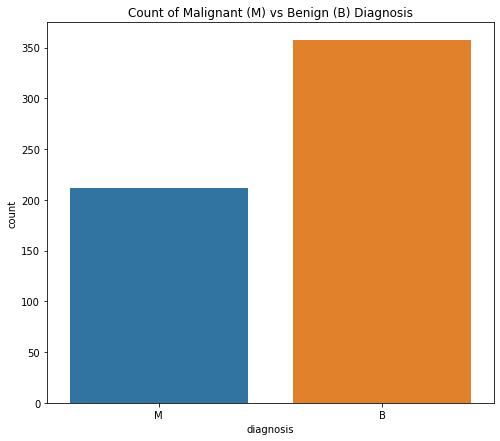

In [8]:
# Exploring relationships between features/variables (correlations)
# Bar graph of diagnosis (M/B)
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df).set(title='Count of Malignant (M) vs Benign (B) Diagnosis')

B, M = df['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [9]:
# Features are categorized by mean, se, and worst
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print("Features Mean: ", features_mean)
print("---")
print("Features SE: ", features_se)
print("---")
print("Features Worst: ", features_worst)

Features Mean:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
---
Features SE:  ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
---
Features Worst:  ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


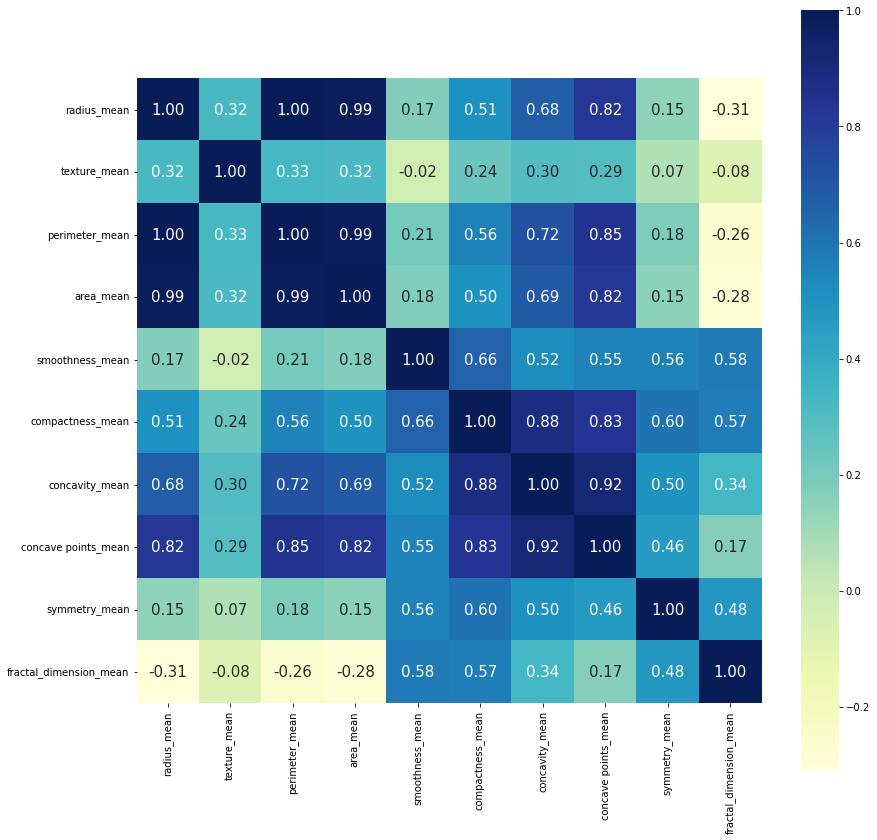

In [10]:
# Preliminary identification of correlation within feature means
corr = df[features_mean].corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, cbar = True, square = True, annot = True, 
            fmt = '.2f', annot_kws = {'size': 15},
            xticklabels= features_mean, yticklabels= features_mean,
            cmap= "YlGnBu")

In [11]:
# create a new binary column if the diagnosis is M the value would be 1 if not is 0
df['diagnosis_binary'] = df['diagnosis'].replace(['M', 'B'], [1, 0])
df.drop("diagnosis", axis = 1, inplace = True)

In [12]:
# Understanding the distribution of the variables 
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

Left skewnes and right skewnes are displayed in the skew result. Values that are closer to zero are considered as a negative (left) skewnes and values are higher than zero are conisdered as a positive (right) skewnes.

In [13]:
#function for Loop through attributes to display histograms and outliers
def hist_box(df):
    for attribute in df.columns:
        sns.set(style="ticks")

        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                        gridspec_kw={"height_ratios": (.20, .80)}, figsize = (12, 8))

        sns.boxplot(x= df[attribute], ax=ax_box)
        sns.histplot(x = df[attribute], ax=ax_hist, kde=True)


        ax_box.set(yticks=[])
        sns.despine(ax=ax_hist)
        sns.despine(ax=ax_box, left=True)

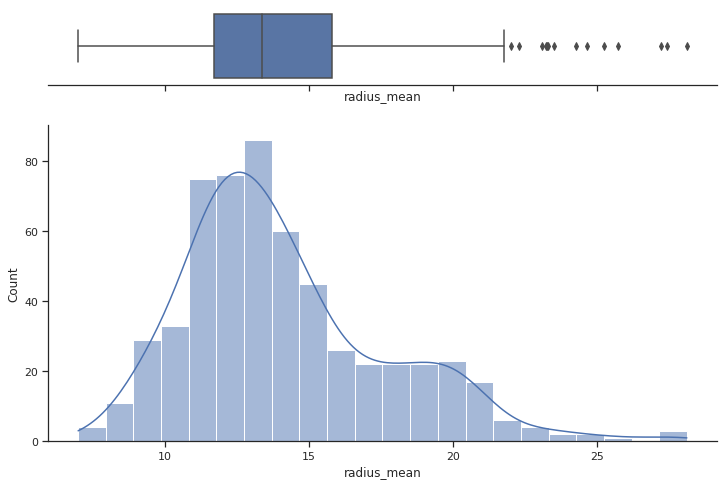

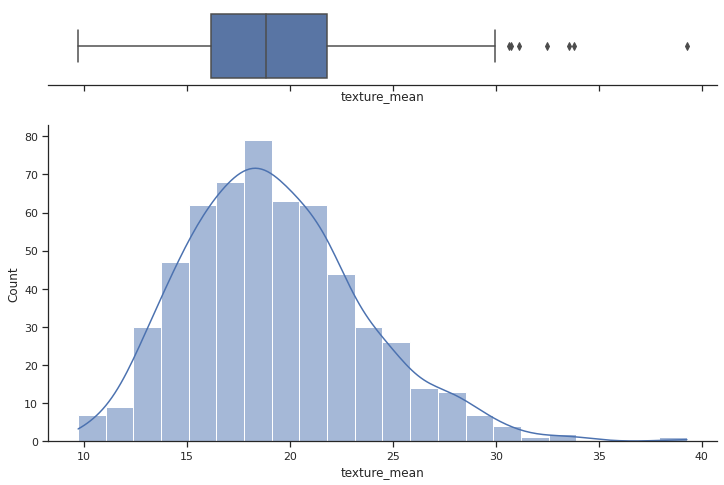

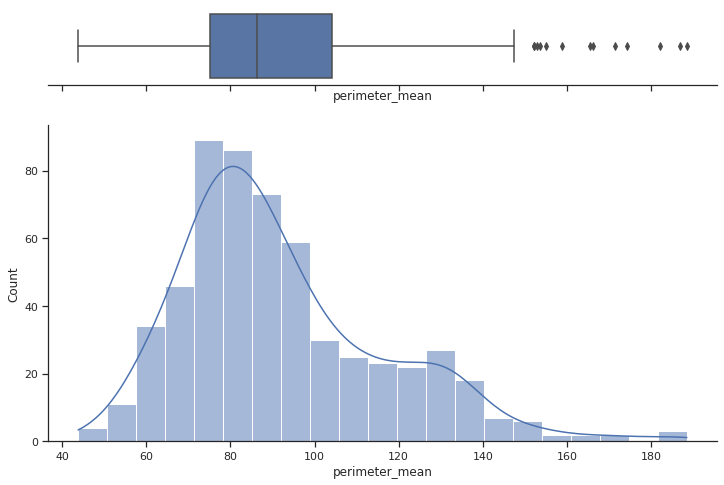

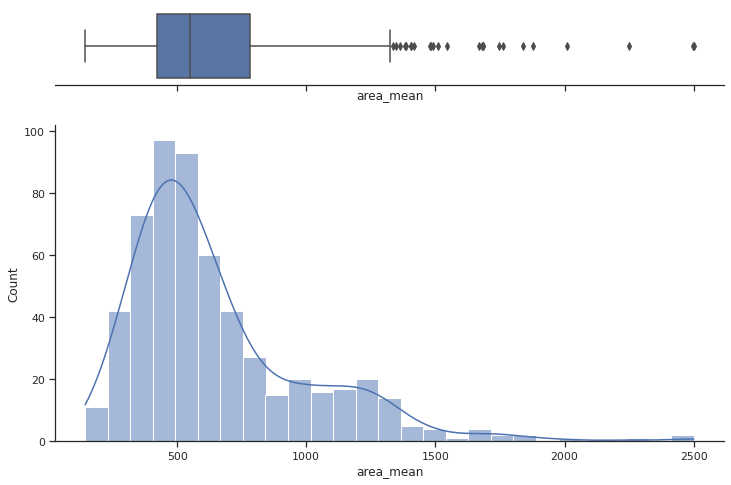

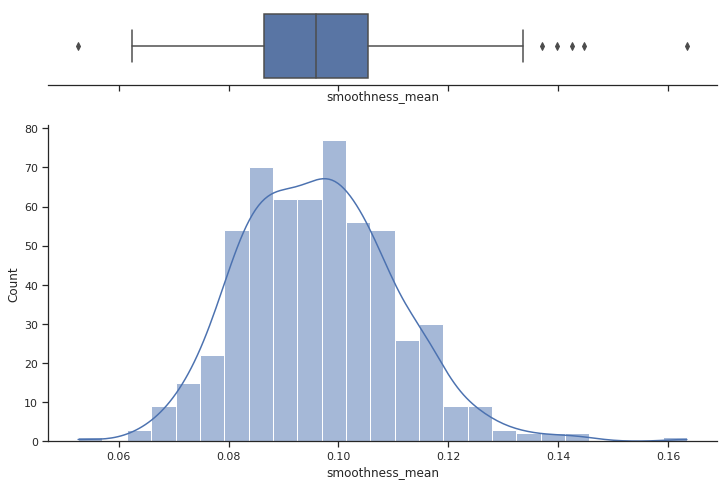

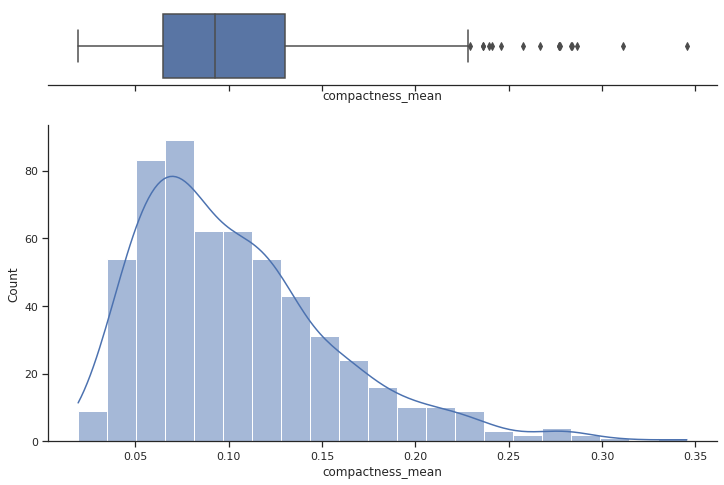

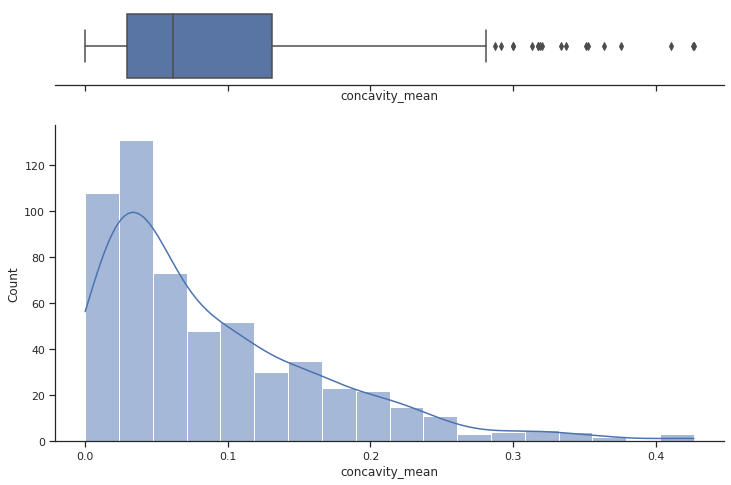

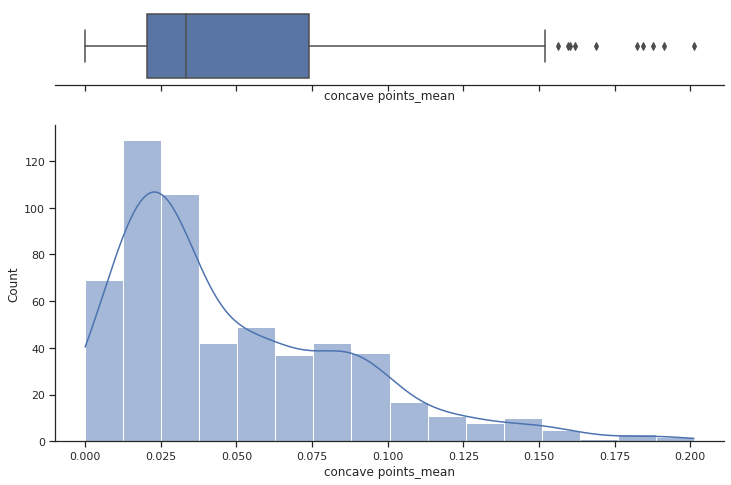

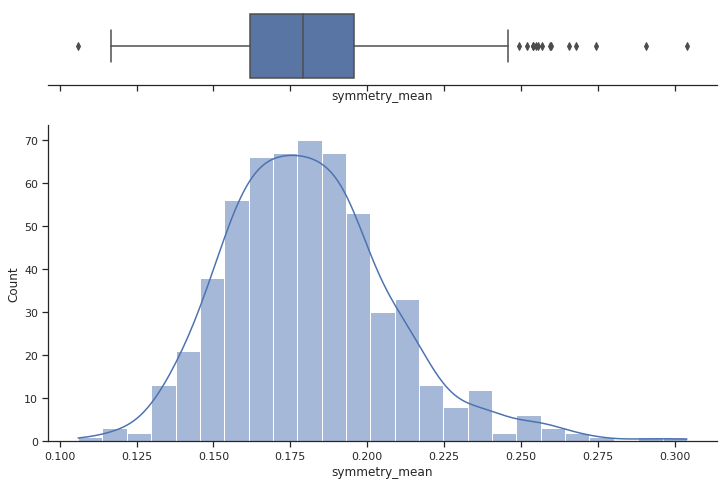

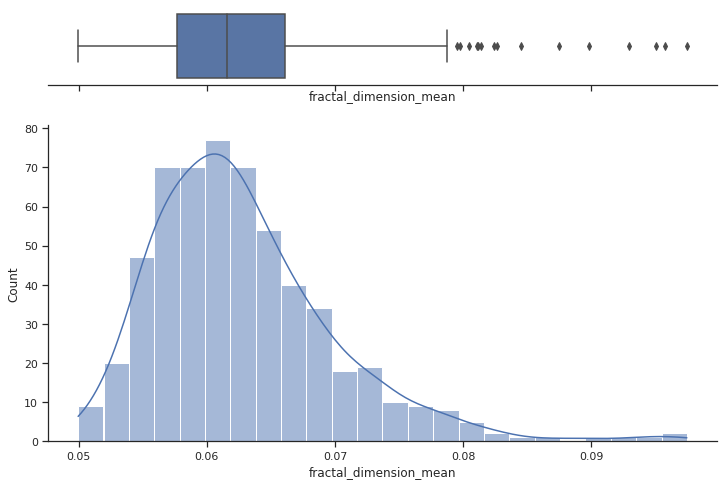

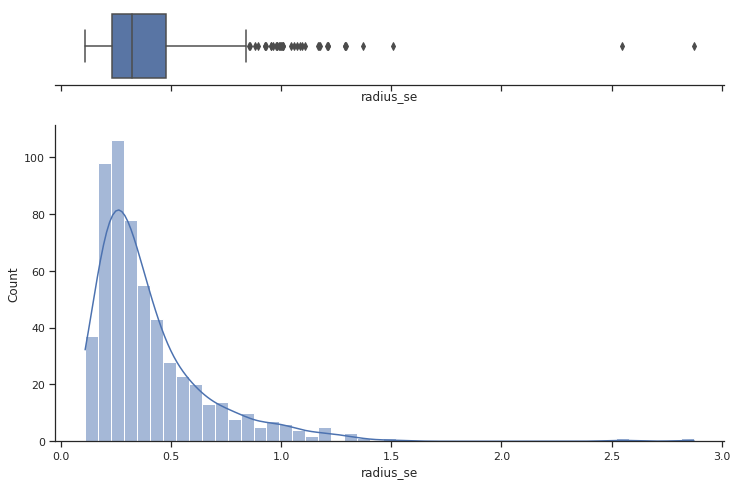

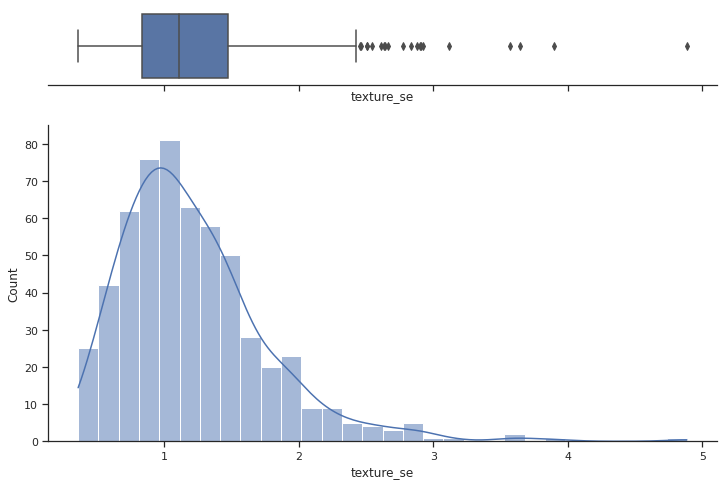

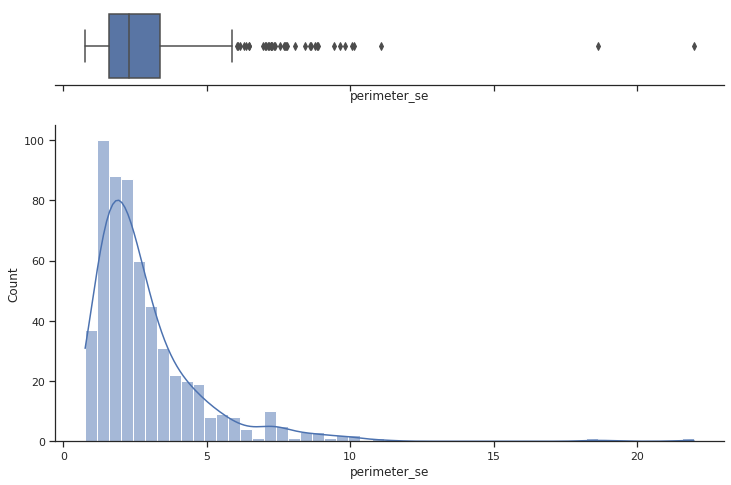

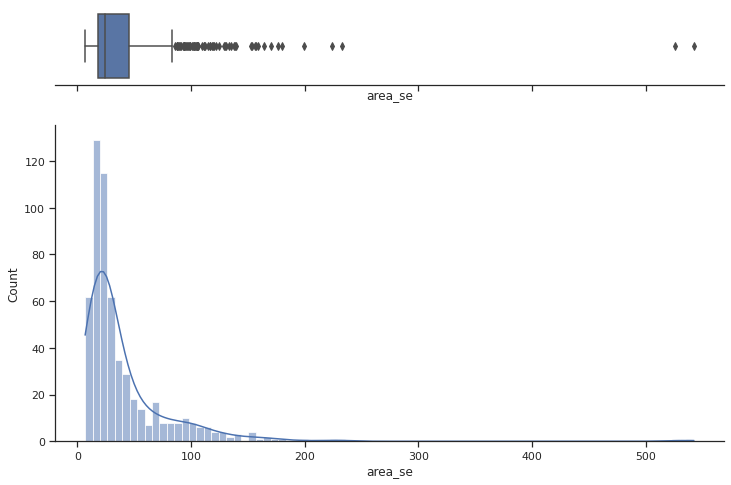

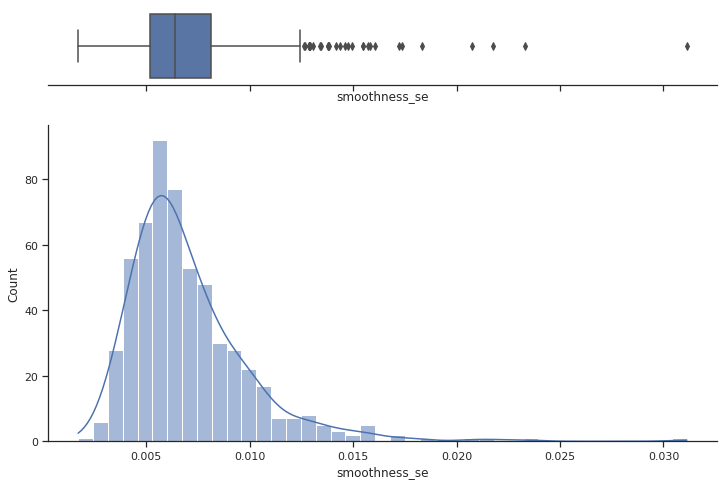

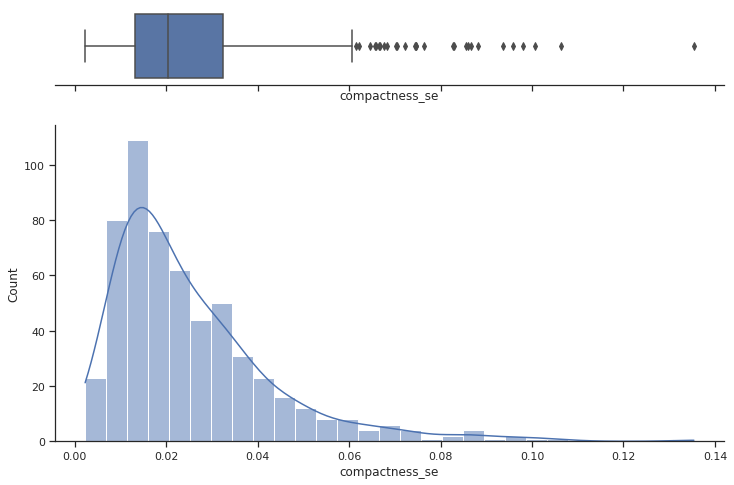

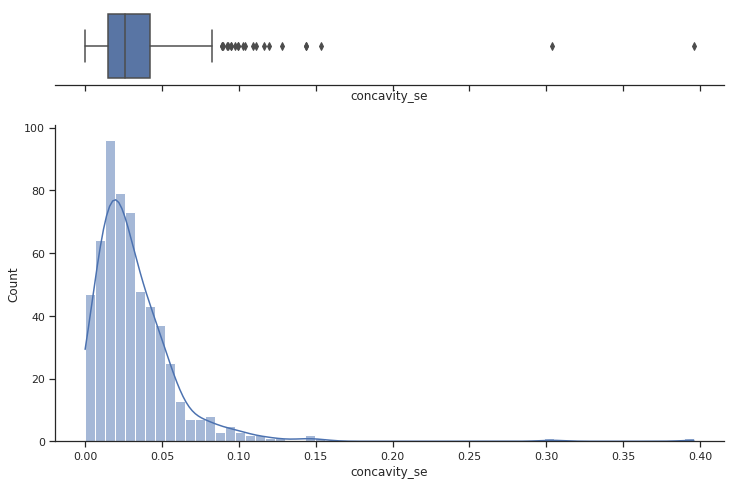

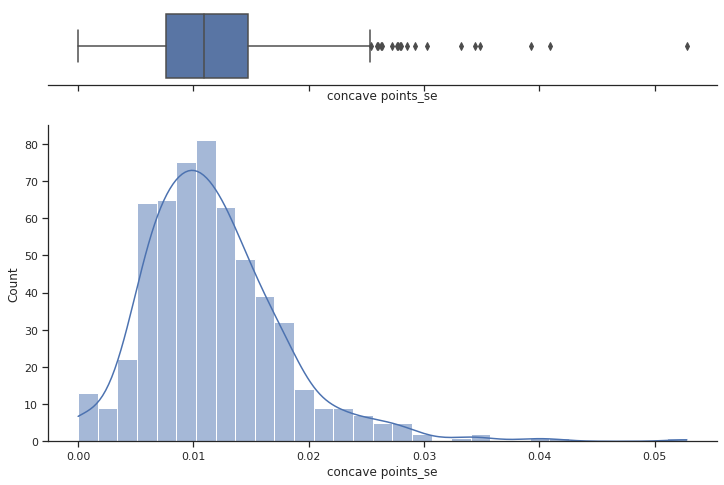

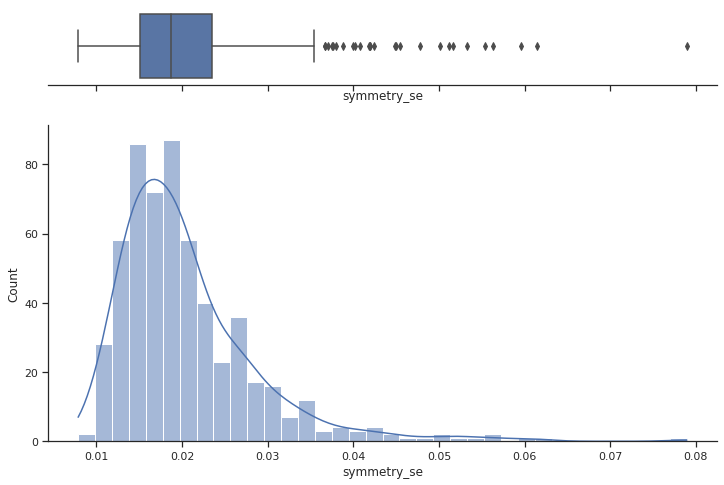

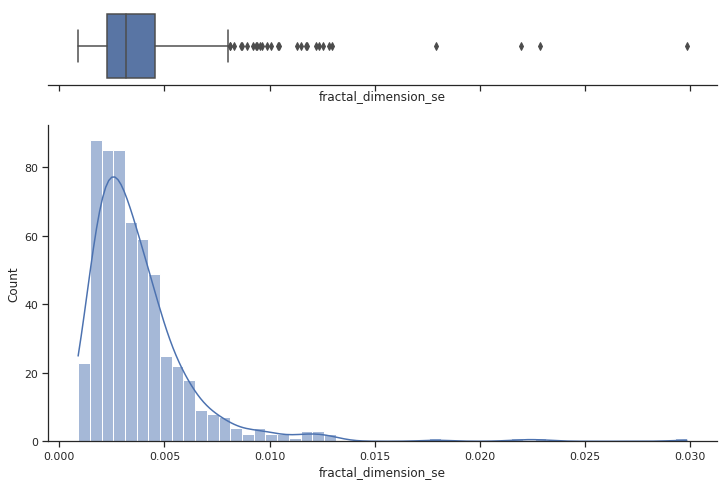

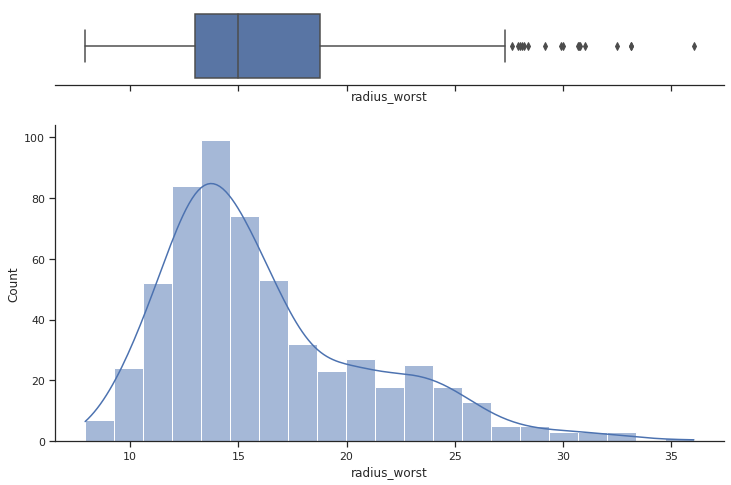

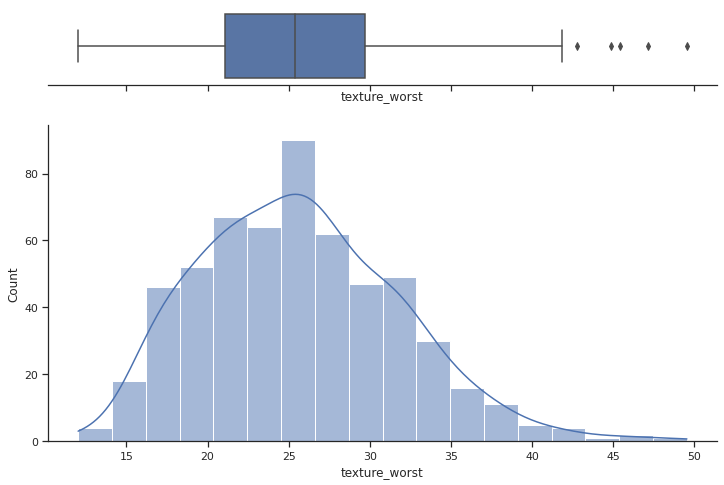

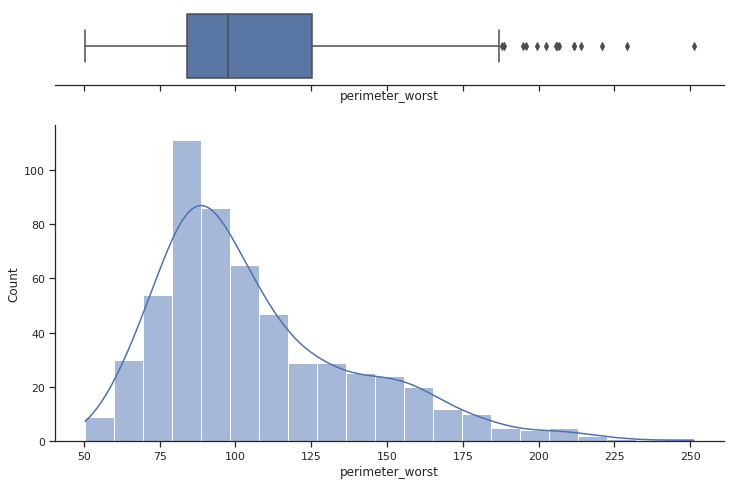

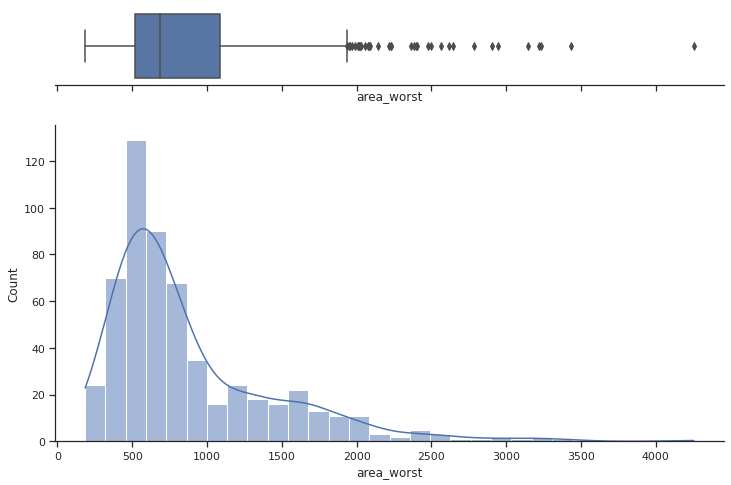

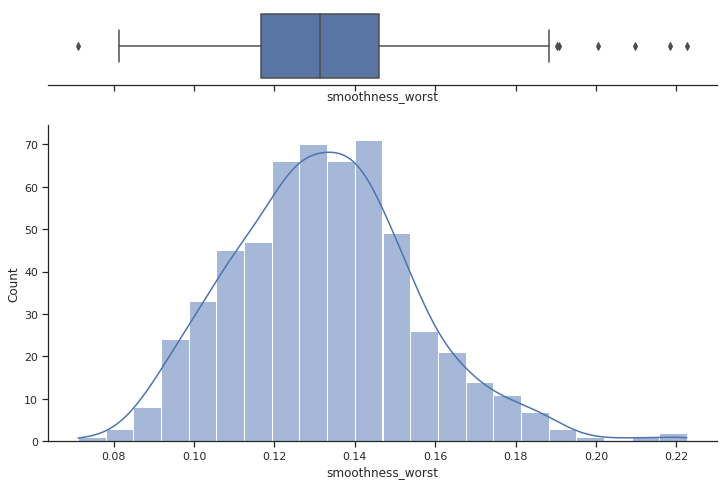

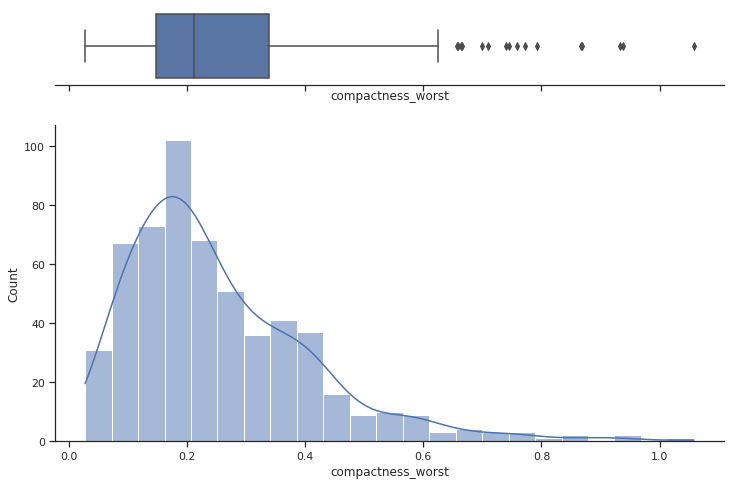

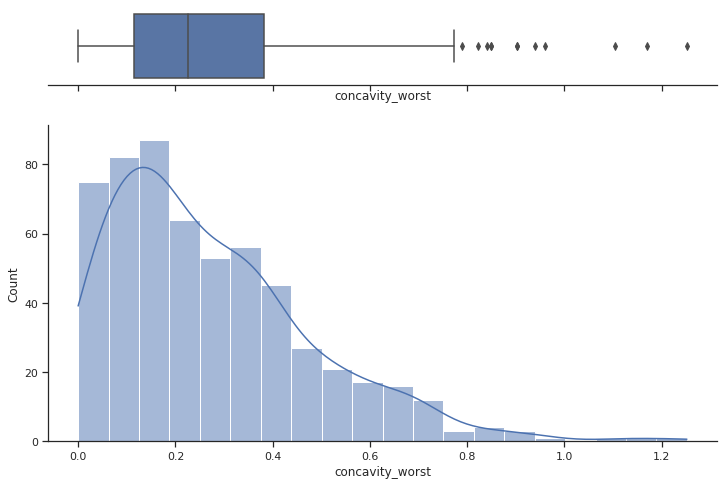

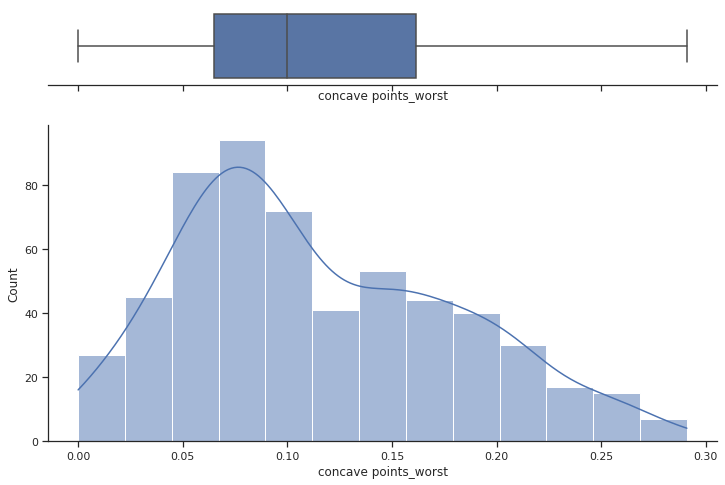

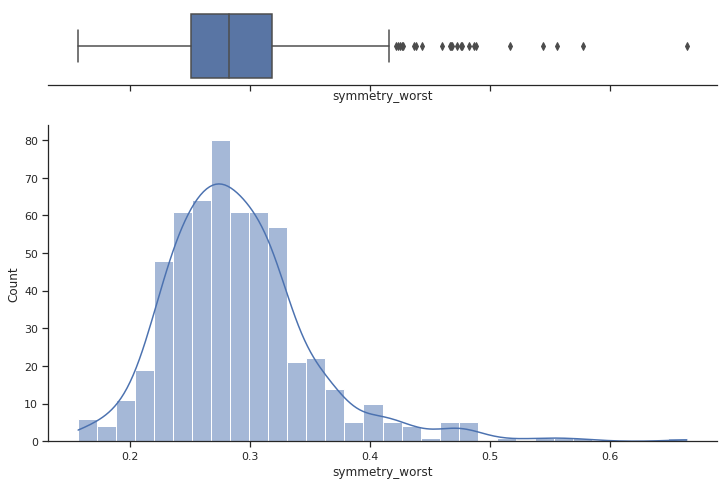

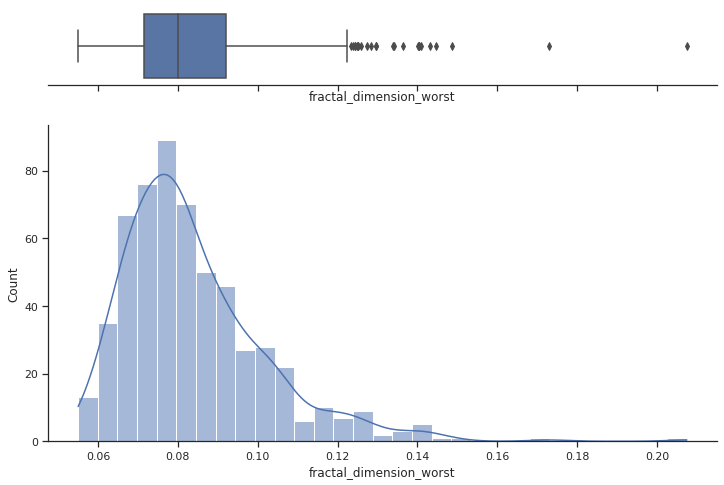

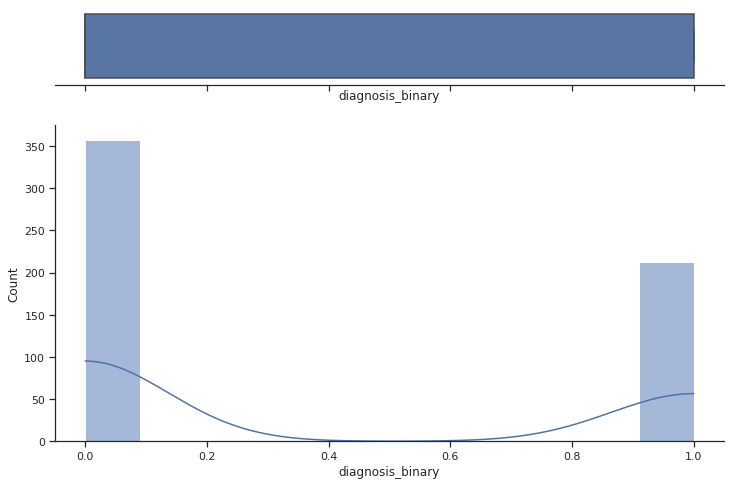

In [14]:
#show charts to display histograms and outliers
hist_box(df)

In [31]:
data_benign = df[df["diagnosis_binary"] == 0]
data_malignant = df[df["diagnosis_binary"] == 1]

# Calculate IQR for benign (0)
desc_0 = data_benign['radius_mean'].describe()
Q1_0 = desc_0[4]
Q3_0 = desc_0[6]
IQR_0 = Q3_0 - Q1_0

lower_bound_0 = (Q1_0 - 1.5 * IQR_0).round(2)
upper_bound_0 = (Q3_0 + 1.5 * IQR_0).round(2)
outliers_0 = data_benign[(data_benign.radius_mean < lower_bound_0) | (data_benign.radius_mean > upper_bound_0)].radius_mean.values

# Calculate IQR for malignant (1)
desc_1 = data_malignant['radius_mean'].describe()
Q1_1 = desc_1[4]
Q3_1 = desc_1[6]
IQR_1 = Q3_1 - Q1_1

lower_bound_1 = (Q1_1 - 1.5 * IQR_1).round(2)
upper_bound_1 = (Q3_1 + 1.5 * IQR_1).round(2)
outliers_1 = data_malignant[(data_malignant.radius_mean < lower_bound_1) | (data_malignant.radius_mean > upper_bound_1)].radius_mean.values

print("Benign - Radius Mean")
print("Lower & Upper Bound: (", lower_bound_0 ,",", upper_bound_0,")")
print("Outliers Detected: ", outliers_0)
print("---")
print("Malignant")
print("Lower & Upper Bound: (", lower_bound_1 ,",", upper_bound_1,")")
print("Outliers Detected: ", outliers_1)


Benign
Lower & Upper Bound: ( 7.65 , 16.8 )
Outliers Detected:  [ 6.981 16.84  17.85 ]
---
Malignant
Lower & Upper Bound: ( 8.3 , 26.36 )
Outliers Detected:  [27.22 28.11 27.42]
